<a href="https://colab.research.google.com/github/geoifg/SMS/blob/main/Script_Regressao_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalação de pacotes necessários (executar apenas uma vez)
!pip install scikit-learn
!pip install statsmodels
!pip install seaborn
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.2 MB/s eta 0:00:00


In [2]:

# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from pingouin import multivariate_normality
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carregar os dados
url = "https://raw.githubusercontent.com/geoifg/SMS/main/Consumo_cerveja.csv"
consumo = pd.read_csv(url, sep=';', decimal='.')

In [4]:
# Visualizar as primeiras linhas
print("Primeiras linhas do dataset:")
print(consumo.head())

Primeiras linhas do dataset:
         Data  Temperatura_Media  Temperatura_Minima  Temperatura_Maxima  \
0  2015-01-01              27.30                23.9                32.5   
1  2015-01-02              27.02                24.5                33.5   
2  2015-01-03              24.82                22.4                29.9   
3  2015-01-04              23.98                21.5                28.6   
4  2015-01-05              23.82                21.0                28.3   

   Precipitacao  Final_de_Semana  Consumo_de_cerveja  
0           0.0                0              25.461  
1           0.0                0              28.972  
2           0.0                1              30.814  
3           1.2                1              29.799  
4           0.0                0              28.900  


In [5]:
# Processamento de dados
consumo['Data'] = pd.to_datetime(consumo['Data'])
consumo['Final_de_Semana'] = consumo['Final_de_Semana'].astype('category')

In [6]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(consumo.describe())



Estatísticas descritivas:
                      Data  Temperatura_Media  Temperatura_Minima  \
count                  365         365.000000          365.000000   
mean   2015-07-02 00:00:00          21.226356           17.461370   
min    2015-01-01 00:00:00          12.900000           10.600000   
25%    2015-04-02 00:00:00          19.020000           15.300000   
50%    2015-07-02 00:00:00          21.380000           17.900000   
75%    2015-10-01 00:00:00          23.280000           19.600000   
max    2015-12-31 00:00:00          28.860000           24.500000   
std                    NaN           3.180108            2.826185   

       Temperatura_Maxima  Precipitacao  Consumo_de_cerveja  
count          365.000000    365.000000          365.000000  
mean            26.611507      5.196712           25.401367  
min             14.500000      0.000000           14.343000  
25%             23.800000      0.000000           22.008000  
50%             26.900000      0.000000  

In [7]:
print("\nInfo do dataset:")
print(consumo.info())


Info do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                365 non-null    datetime64[ns]
 1   Temperatura_Media   365 non-null    float64       
 2   Temperatura_Minima  365 non-null    float64       
 3   Temperatura_Maxima  365 non-null    float64       
 4   Precipitacao        365 non-null    float64       
 5   Final_de_Semana     365 non-null    category      
 6   Consumo_de_cerveja  365 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 17.7 KB
None


In [10]:
# Divisão treino-teste
X = consumo.drop('Consumo_de_cerveja', axis=1)
y = consumo['Consumo_de_cerveja']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100)

In [11]:
print(f"\nTamanho do treino: {len(X_train)}")
print(f"Tamanho do teste: {len(X_test)}")


Tamanho do treino: 255
Tamanho do teste: 110


In [12]:
# Análise de correlação
numeric_cols = ['Temperatura_Media', 'Temperatura_Minima',
                'Temperatura_Maxima', 'Precipitacao', 'Consumo_de_cerveja']
corr_matrix = consumo[numeric_cols].corr()

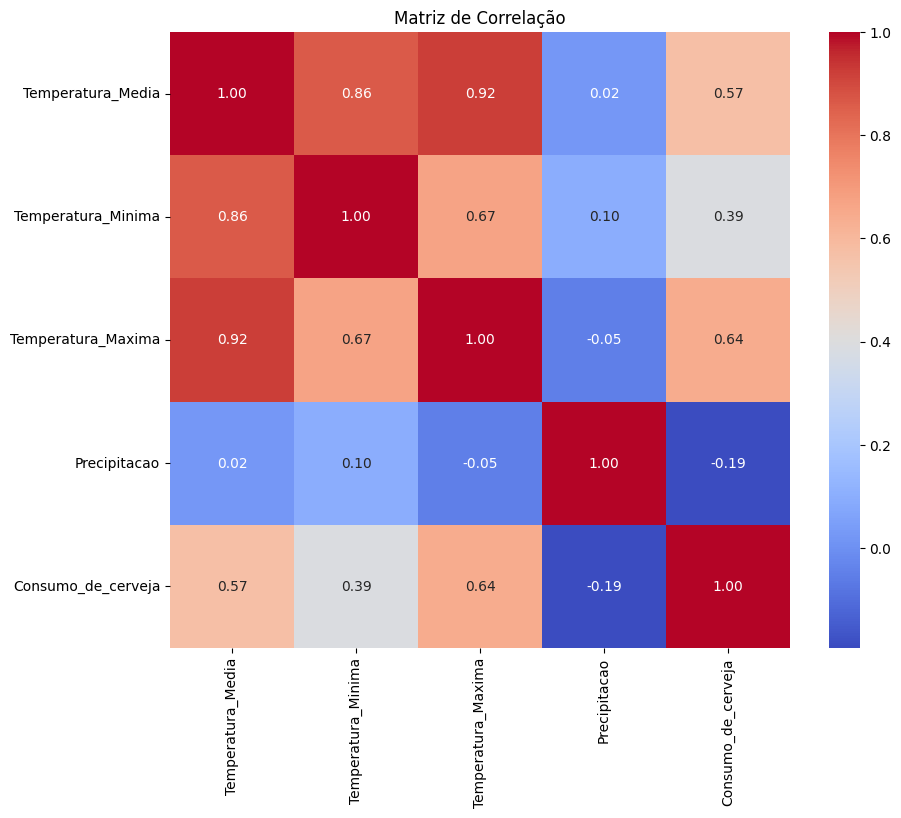

In [14]:
#Plotar grafico de matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [16]:
# Modelo de regressão linear múltipla
modelo_lm = ols('Consumo_de_cerveja ~ Temperatura_Maxima + Precipitacao + C(Final_de_Semana)',
                data=consumo).fit()

In [17]:

print("\nResumo do modelo de regressão:")
print(modelo_lm.summary())


Resumo do modelo de regressão:
                            OLS Regression Results                            
Dep. Variable:     Consumo_de_cerveja   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     313.5
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          3.85e-100
Time:                        16:09:00   Log-Likelihood:                -824.09
No. Observations:                 365   AIC:                             1656.
Df Residuals:                     361   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

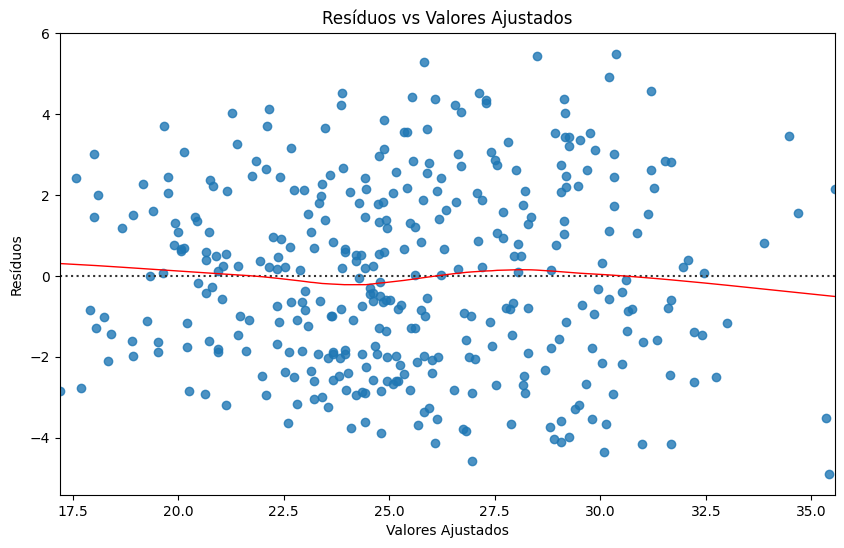

In [18]:
# Diagnóstico do modelo
# Resíduos vs Valores Ajustados
plt.figure(figsize=(10,6))
sns.residplot(x=modelo_lm.fittedvalues, y=modelo_lm.resid, lowess=True,
              line_kws={'color': 'red', 'lw': 1})
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

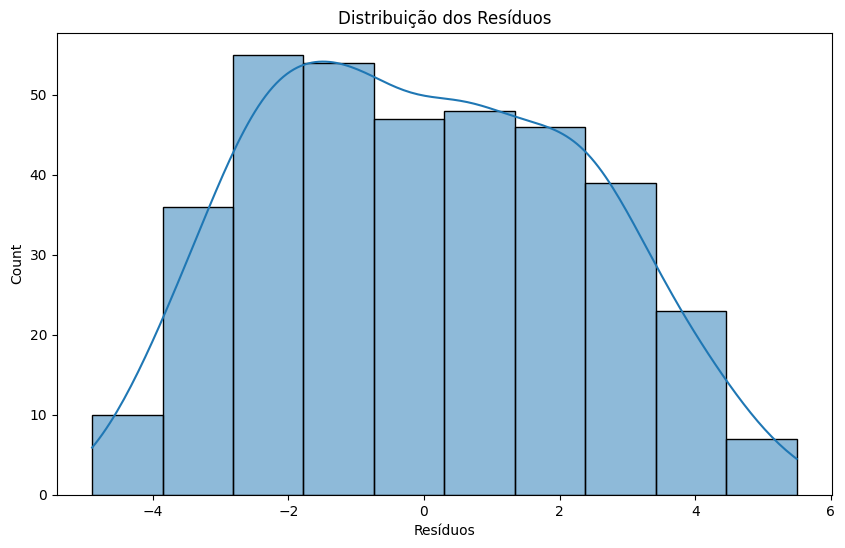

In [19]:
# Histograma dos resíduos
plt.figure(figsize=(10,6))
sns.histplot(modelo_lm.resid, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.show()

<Figure size 1000x600 with 0 Axes>

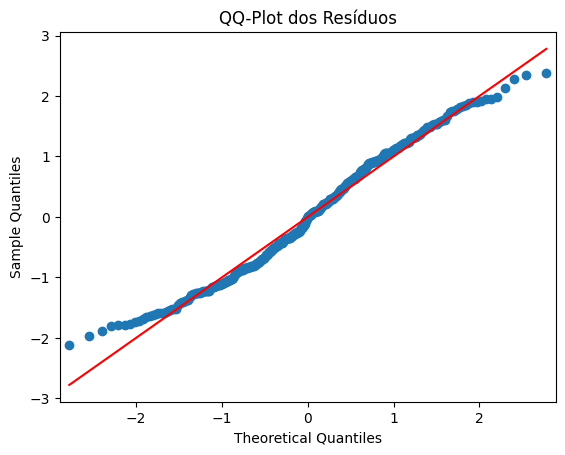

In [20]:
# QQ-Plot
plt.figure(figsize=(10,6))
qqplot(modelo_lm.resid, line='s', fit=True)
plt.title('QQ-Plot dos Resíduos')
plt.show()

In [21]:
# Teste de normalidade
print("\nTeste de Shapiro-Wilk:")
shapiro_test = stats.shapiro(modelo_lm.resid)
print(f"Estatística: {shapiro_test[0]:.4f}, p-valor: {shapiro_test[1]:.4f}")


Teste de Shapiro-Wilk:
Estatística: 0.9800, p-valor: 0.0001


In [22]:
# Predições no conjunto de teste
X_test = sm.add_constant(X_test)  # Adicionar intercepto
y_pred = modelo_lm.predict(X_test)

In [23]:
# Métricas de avaliação
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nMétricas de avaliação:")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


Métricas de avaliação:
R²: 0.6424
RMSE: 2.3140
MAE: 2.0199
MAPE: 8.14%


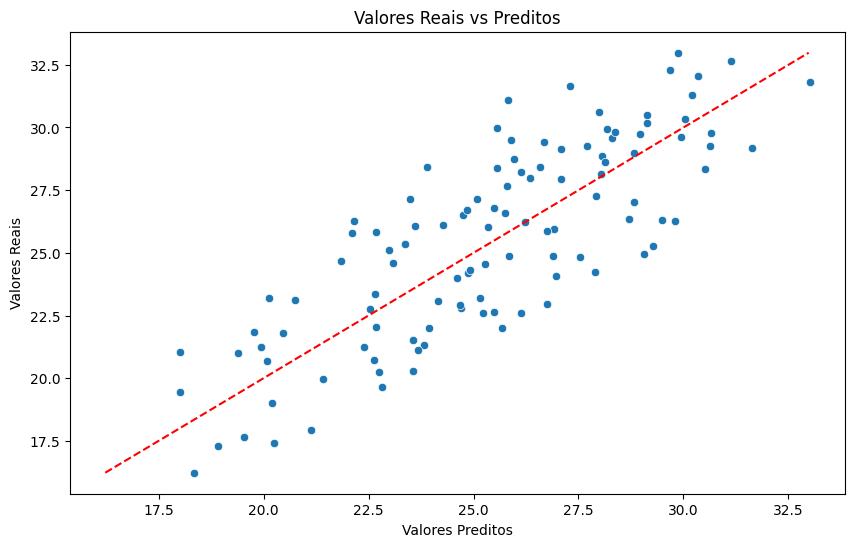

In [24]:
# Gráfico de valores reais vs preditos
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Valores Reais vs Preditos')
plt.show()